In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [19]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target  # Add target column (house price)

In [20]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
# check for missing values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [24]:
# statistical measures of the dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [26]:
correlation = df.corr()

# 1: Perfect positive correlation (as one variable increases, the other also increases).
# -1: Perfect negative correlation (as one variable increases, the other decreases).
# 0: No correlation (no linear relationship between the variables).

<Axes: >

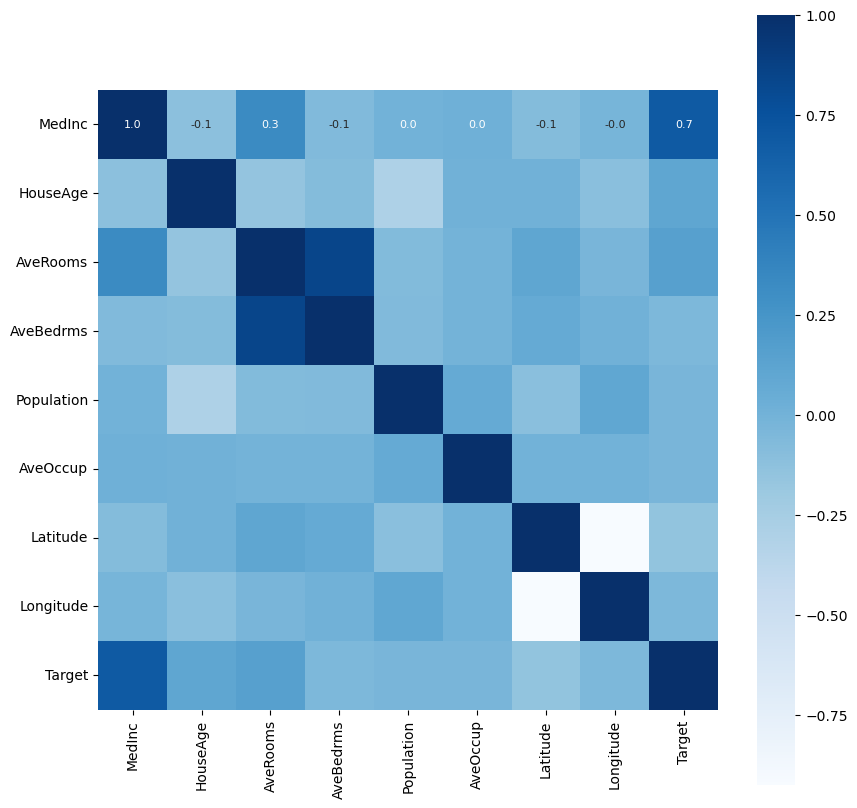

In [28]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


# cbar=True:    Displays a color bar on the side, indicating the correlation values.
# square=True:  Ensures that each cell in the heatmap is a perfect square.
# fmt='.1f':   Formats the numerical values inside the heatmap to one decimal place.
# annot=True:  Displays the correlation values in each cell.
# annot_kws={'size':8}:    Sets the font size of the correlation numbers inside the heatmap.
# cmap='Blues':   Uses the Blues colormap for color representation (darker blue for higher correlation, lighter for lower).

In [31]:
X = df.drop(['Target'], axis=1)
Y = df['Target']

In [32]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [35]:
model = XGBRegressor()

In [36]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
y_pred = model.predict(X_train)

In [38]:
print(y_pred)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [40]:
# R squared error
score_1 = metrics.r2_score(Y_train, y_pred)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, y_pred)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.943650140819218
Mean Absolute Error :  0.1933648700612105


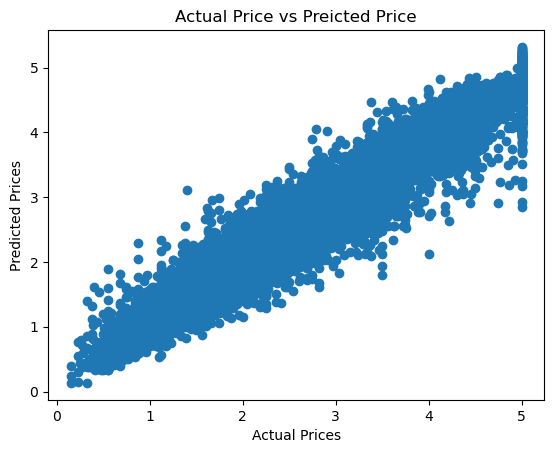

In [42]:
plt.scatter(Y_train, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [43]:
test_data_prediction = model.predict(X_test)

In [48]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8338000331788725
Mean Absolute Error :  0.3108631800268186


In [50]:
import joblib
joblib.dump(model, "house_price_model.pkl")

# Load model function (optional)
def load_model():
    return joblib.load("house_price_model.pkl")

In [51]:
def predict_house_price():
    model = load_model()  # Load trained model
    
    print("\nEnter house details:")
    
    # User input for each feature
    MedInc = float(input("Median Income: "))
    HouseAge = float(input("House Age: "))
    AveRooms = float(input("Average Rooms: "))
    AveBedrms = float(input("Average Bedrooms: "))
    Population = float(input("Population: "))
    AveOccup = float(input("Average Occupancy: "))
    Latitude = float(input("Latitude: "))
    Longitude = float(input("Longitude: "))
    
    # Creating an input array
    input_data = np.array([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]])
    
    # Making a prediction
    prediction = model.predict(input_data)
    
    print(f"\nPredicted House Price: ${prediction[0] * 100000:.2f}")  # Convert back to actual price

# Run prediction function
predict_house_price()


Enter house details:


Median Income:  8.32
House Age:  41
Average Rooms:  7
Average Bedrooms:  1
Population:  3222
Average Occupancy:  2.5
Latitude:  37.8
Longitude:  -122.2



Predicted House Price: $451447.68
